In [1]:
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt

/home/arogya/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
f = open("logs.txt", "w")
subprocess.call("ls -al", shell=True, stdout=f)

0

In [3]:
afg = gpd.read_file("../../data/inputs/afghanistan.gpkg")

<AxesSubplot:>

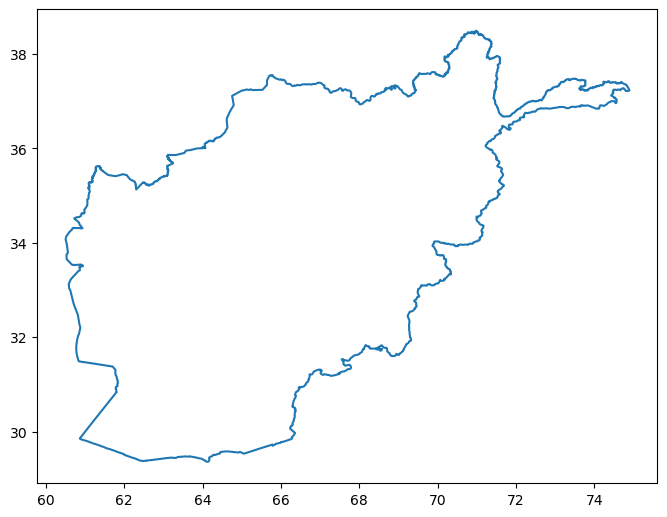

In [7]:
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi = 100)
afg.boundary.plot(ax=ax)

In [11]:
from pathlib import Path

DATA_DIR = "../../tmpdata"

VECTOR_OUTPUT_DIR = f'{DATA_DIR}/interim'
SHP = f"{DATA_DIR}/inputs/afghanistan.gpkg"
Path(VECTOR_OUTPUT_DIR).mkdir(parents=True, exist_ok=True)


sh = ShapefileHelper(SHP,VECTOR_OUTPUT_DIR)
sh.make_grid(10000, "10000");
sh.make_grid(25000, "25000");
sh.make_grid(50000, "50000");
sh.make_grid(100000, "100000");
sh.make_grid(200000, "200000");

--------- Generating grid at 10000mx10000m ...
--------- Grid generation complete. Saving to disk...
--------- Successfully saved to disk: ../../tmpdata//interim/10000.gpkg
--------- Generating grid at 25000mx25000m ...
--------- Grid generation complete. Saving to disk...
--------- Successfully saved to disk: ../../tmpdata//interim/25000.gpkg
--------- Generating grid at 50000mx50000m ...
--------- Grid generation complete. Saving to disk...
--------- Successfully saved to disk: ../../tmpdata//interim/50000.gpkg
--------- Generating grid at 100000mx100000m ...
--------- Grid generation complete. Saving to disk...
--------- Successfully saved to disk: ../../tmpdata//interim/100000.gpkg


In [46]:
tiles_ = ["10000", "25000", "50000", "100000", "200000"]
districts_ = ["2308", "3103", "1905", "2416", "2601"]

tiles = []
for tile in tiles_:
    tiles.append(gpd.read_file(f"{DATA_DIR}/interim/{tile}.gpkg"))

districts = []
for dist in districts_:
    districts.append(gpd.read_file(f"{DATA_DIR}/inputs/{dist}.gpkg"))

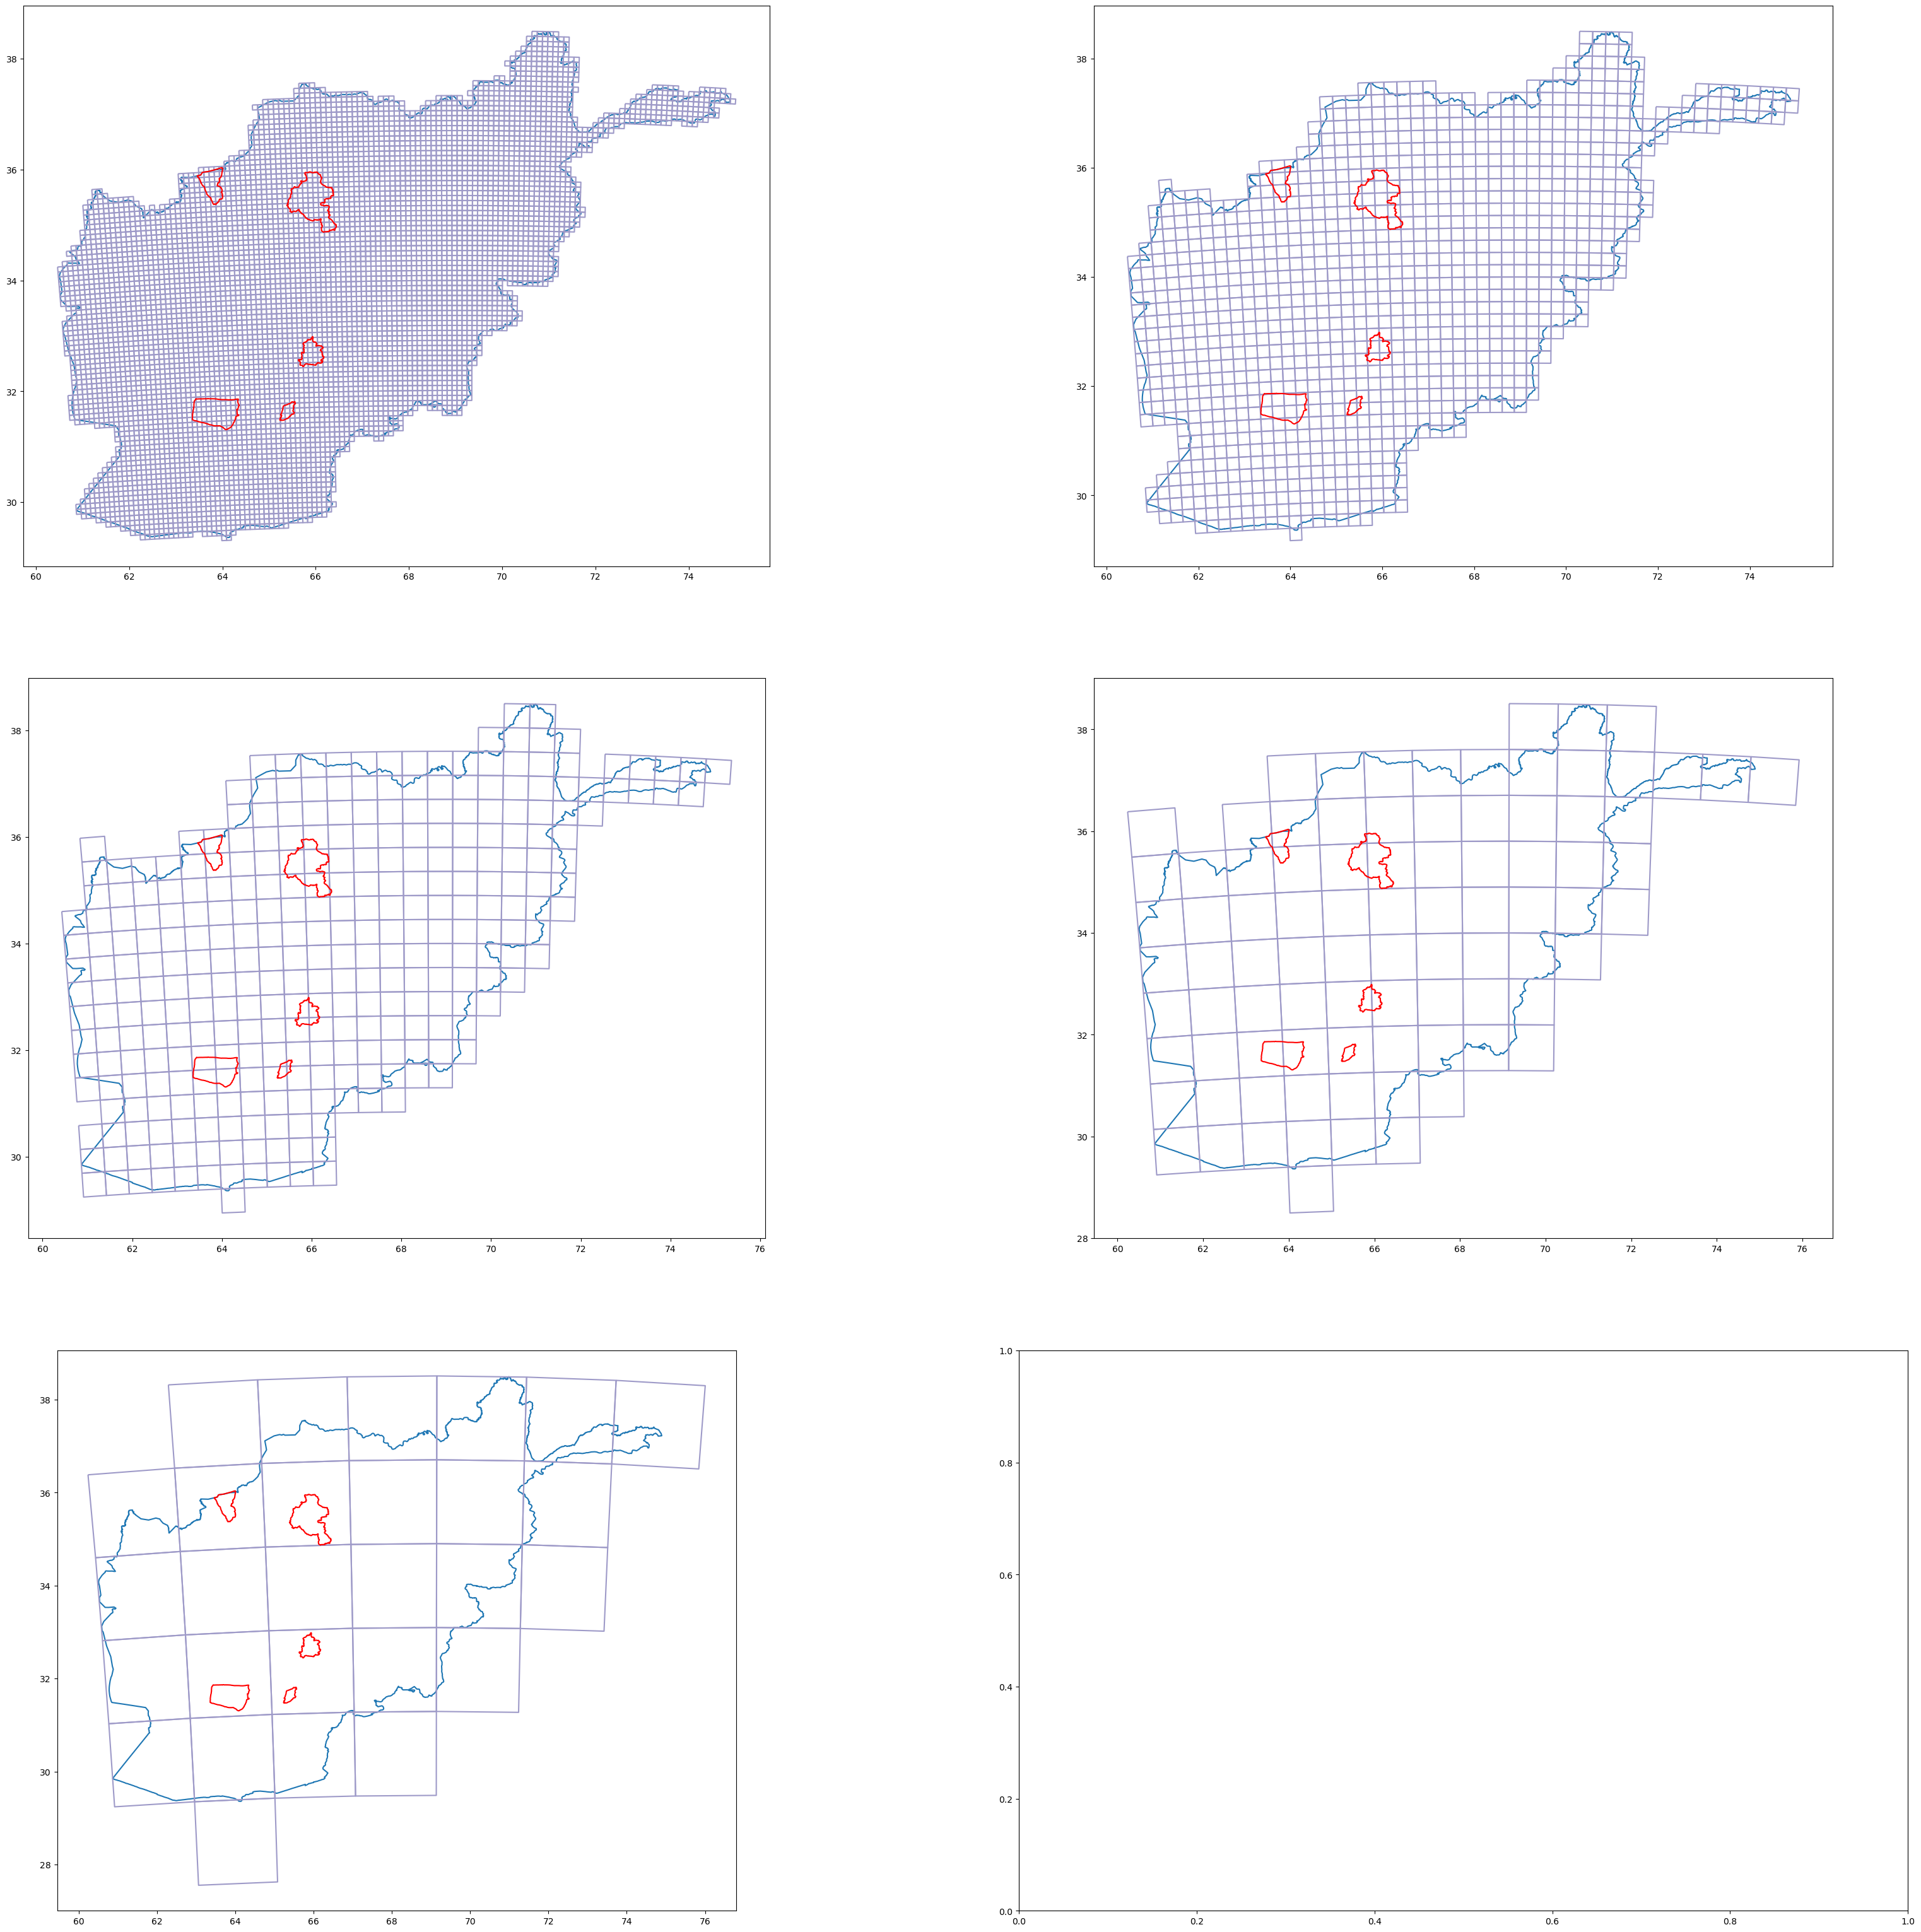

In [47]:
fig, ax = plt.subplots(3,2,figsize=(40,40), dpi = 100)
ax = ax.flatten()
    
for i, tile in enumerate(tiles):
    afg.boundary.plot(ax=ax[i])
    tile.boundary.plot(ax=ax[i], color="#9e9ac8")
    for j, district in enumerate(districts):
        districts[j].boundary.plot(ax=ax[i], color="red")
    

In [48]:
tiles[1]

,grid_id,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,0,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.45129 34.37614, 60.72031 34.39478..."
1,1,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.47399 34.15319, 60.74231 34.17166..."
2,2,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.49644 33.93021, 60.76408 33.94853..."
3,3,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.51865 33.70721, 60.78560 33.72538..."
4,4,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.54061 33.48419, 60.80689 33.50221..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1146,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((74.51688 37.47747, 74.79823 37.46395..."
1147,1147,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((74.50044 37.25316, 74.78095 37.23976..."
1148,1148,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((74.48417 37.02885, 74.76387 37.01555..."
1149,1149,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((74.79823 37.46395, 75.07938 37.44977..."


In [8]:
import geopandas as gpd
from osgeo import ogr
from math import ceil
import shutil
import os
from shapely.geometry import box
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")


# Shape file helper class
class ShapefileHelper():
    
    def __init__(self, dissolved_aoi_shapefile, vector_output_dir):
        self.raw = dissolved_aoi_shapefile
        self.vector_output_dir = vector_output_dir + "/"
        self._make_dir()
        self._read_file()
    
    def make_grid(self, resolution, name, out_crs="epsg:4326", id_col="grid_id"):
#         self.gdf.boundary.plot()
        
        gridWidth, gridHeight = resolution, resolution
        xmin, ymin, xmax, ymax = self.gdf.bounds.iloc[0]['minx'],  self.gdf.bounds.iloc[0]['miny'],  self.gdf.bounds.iloc[0]['maxx'],  self.gdf.bounds.iloc[0]['maxy']
        
        outputGridfn = name
        
        # get rows
        rows = ceil((ymax-ymin)/gridHeight)
        # get columns
        cols = ceil((xmax-xmin)/gridWidth)

        # start grid cell envelope
        ringXleftOrigin = xmin
        ringXrightOrigin = xmin + gridWidth
        ringYtopOrigin = ymax
        ringYbottomOrigin = ymax-gridHeight
        
        # create output file
        outDriver = ogr.GetDriverByName('ESRI Shapefile')
#         if os.path.exists(self.vector_output_dir + outputGridfn):
#             print("Deleting pre-existing shapefile: {}{}{}.shp".format(self.vector_output_dir,outputGridfn+"/", outputGridfn))
#             shutil.rmtree(self.vector_output_dir + outputGridfn,  ignore_errors=True)
            
#         if os.path.isdir(self.vector_output_dir):
#             print("Deleting pre-existing folder: {}{}/".format(self.vector_output_dir, outputGridfn))
#             shutil.rmtree(self.vector_output_dir + outputGridfn,  ignore_errors=True)
#         else:
#             os.makedirs(self.vector_output_dir)
#             print("Created new directory: {}{}/".format(self.vector_output_dir, outputGridfn))
            
            
        outDataSource = outDriver.CreateDataSource(self.vector_output_dir + outputGridfn + ".shp")
        outLayer = outDataSource.CreateLayer(outputGridfn,geom_type=ogr.wkbPolygon)
        featureDefn = outLayer.GetLayerDefn()
        
        print(f'--------- Generating grid at {resolution}mx{resolution}m ...')

        # create grid cells
        countcols = 0
        while countcols < cols:
            countcols += 1

            # reset envelope for rows
            ringYtop = ringYtopOrigin
            ringYbottom =ringYbottomOrigin
            countrows = 0

            while countrows < rows:
                countrows += 1
                ring = ogr.Geometry(ogr.wkbLinearRing)
                ring.AddPoint(ringXleftOrigin, ringYtop)
                ring.AddPoint(ringXrightOrigin, ringYtop)
                ring.AddPoint(ringXrightOrigin, ringYbottom)
                ring.AddPoint(ringXleftOrigin, ringYbottom)
                ring.AddPoint(ringXleftOrigin, ringYtop)
                poly = ogr.Geometry(ogr.wkbPolygon)
                poly.AddGeometry(ring)

                # add new geom to layer
                outFeature = ogr.Feature(featureDefn)
                outFeature.SetGeometry(poly)
                outLayer.CreateFeature(outFeature)
                outFeature.Destroy

                # new envelope for next poly
                ringYtop = ringYtop - gridHeight
                ringYbottom = ringYbottom - gridHeight

            # new envelope for next poly
            ringXleftOrigin = ringXleftOrigin + gridWidth
            ringXrightOrigin = ringXrightOrigin + gridWidth
        # Close DataSources
        outDataSource.Destroy()
        print('--------- Grid generation complete. Saving to disk...')        
        
        
#         # clip to boundary
        output = gpd.read_file(self.vector_output_dir + outputGridfn +".shp")
        
        output = output.set_crs("epsg:32642").to_crs(out_crs).reset_index().rename(columns={"index": id_col}).drop('FID', axis=1)
        output = gpd.sjoin(output, self.gdf.to_crs("epsg:4326")).drop('index_right', axis=1)
        
        
#         output = gpd.sjoin(output.to_crs("epsg:4326"), self.gdf).drop('index_right', axis=1)

        
#         print("Saving generated shapefile to disk..")
#         if os.path.exists(self.vector_output_dir + outputGridfn):
#             directory = self.vector_output_dir + outputGridfn
#             for f in os.listdir(directory):
#                 os.remove(os.path.join(directory, f))

        self.output = output
        output = output.drop(id_col, axis=1).reset_index().drop('index', axis=1).reset_index().rename(columns={'index': id_col})
        output.to_file(self.vector_output_dir + outputGridfn + ".gpkg", driver='GPKG')
        self._clean_dir()
        print("--------- Successfully saved to disk: {}".format(self.vector_output_dir + outputGridfn+ ".gpkg"))
        return output

    def subset_grid(self, grid_path, aoi_path):
        aoi = gpd.read_file(aoi_path)
        grid = gpd.read_file(grid_path)
        
        subset = gpd.sjoin(grid, aoi).drop('index_right', axis=1)
        subset.to_file(grid_path, driver='GPKG')
        
    def _read_file(self):
        raw = gpd.read_file(self.raw)
#         geom = box(*raw.total_bounds)
#         gdf = gpd.GeoDataFrame([{"geometry": geom}])
#         gdf = gdf.set_crs("epsg:4326")
        self.gdf = raw.to_crs("epsg:32642")
    
    def _make_dir(self):
        Path(self.vector_output_dir).mkdir(parents=True, exist_ok=True)
    
    def _clean_dir(self):
        test = os.listdir(self.vector_output_dir)

        for item in test:
            if item.endswith(".shp"):
                os.remove(os.path.join(self.vector_output_dir, item))
            if item.endswith(".shx"):
                os.remove(os.path.join(self.vector_output_dir, item))
            if item.endswith(".dbf"):
                os.remove(os.path.join(self.vector_output_dir, item))
        
